In [20]:
# Compare the time it takes to run strassen algorithm and the time it takes to run the naive algorithm
import time
import matplotlib.pyplot as plt
from strassen import *
import numpy as np
from tqdm import tqdm

# create a list of sizes of matrices
sizes = [2**i for i in range(1, 11)]

# create a list of time it takes to run strassen algorithm
strassen_times = []

# create a list of time it takes to run naive algorithm
naive_times = []

In [21]:
def naive(A, B):
    if (len(A[0]) != len(B)):
        raise ValueError("Matrix A's column size does not match matrix B's row size")
    
    n = len(A)
    m = len(A[0])

    # initialize the matrix
    C = np.zeros((n, m))

    # iterate through the matrix
    for i in range(n):
        for j in range(m):
            for k in range(len(B)):
                C[i][j] += A[i][k] * B[k][j]

    return C

In [22]:
# Assume A and B are square matrices and the size of A and B are the exponent of 2
def shallow_strassen(A, B, threshold=1):
    if (len(A) != len(B)):
        raise ValueError("Matrix A's size does not match matrix B's size")
    
    n = len(A)

    # initialize the matrix
    C = np.zeros((n, n))

    # base case
    if (n <= threshold):
        return naive(A, B)
    
    # divide the matrix into 4 submatrices
    A11 = A[:n//2, :n//2]
    A12 = A[:n//2, n//2:]
    A21 = A[n//2:, :n//2]
    A22 = A[n//2:, n//2:]

    B11 = B[:n//2, :n//2]
    B12 = B[:n//2, n//2:]
    B21 = B[n//2:, :n//2]
    B22 = B[n//2:, n//2:]

    # calculate the 7 products
    M1 = shallow_strassen(A11 + A22, B11 + B22, threshold)
    M2 = shallow_strassen(A21 + A22, B11, threshold)
    M3 = shallow_strassen(A11, B12 - B22, threshold)
    M4 = shallow_strassen(A22, B21 - B11, threshold)
    M5 = shallow_strassen(A11 + A12, B22, threshold)
    M6 = shallow_strassen(A21 - A11, B11 + B12, threshold)
    M7 = shallow_strassen(A12 - A22, B21 + B22, threshold)

    # calculate the 4 submatrices of C
    C11 = M1 + M4 - M5 + M7
    C12 = M3 + M5
    C21 = M2 + M4
    C22 = M1 - M2 + M3 + M6

    # combine the 4 submatrices into one matrix
    C = np.vstack((np.hstack((C11, C12)), np.hstack((C21, C22))))

    return C

100%|██████████| 10/10 [17:37<00:00, 105.76s/it]


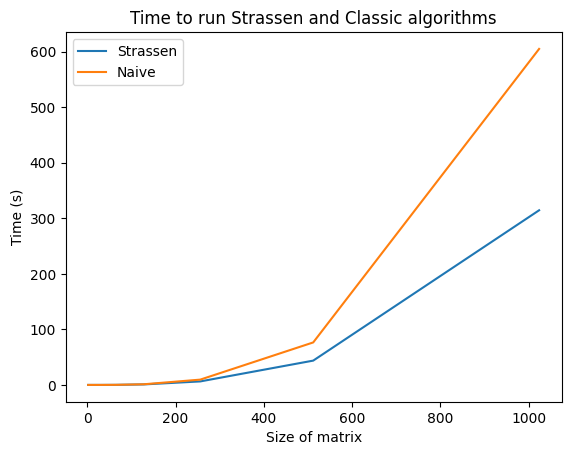

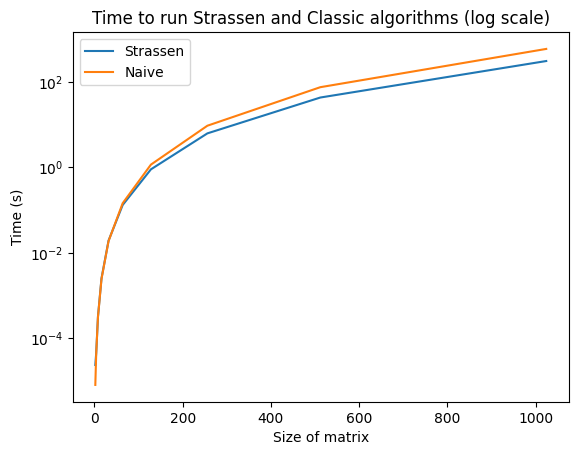

In [23]:
# For each size, run the strassen algorithm and the naive algorithm
for size in tqdm(sizes):
    # create two random matrices
    A = np.random.rand(size, size)
    B = np.random.rand(size, size)

    # run the strassen algorithm
    start = time.time()
    # s = strassen(A, B)
    # s.strassen(A, B)
    shallow_strassen(A, B, threshold=32)
    end = time.time()
    strassen_times.append(end-start)

    # run the naive algorithm
    start = time.time()
    naive(A, B)
    end = time.time()
    naive_times.append(end-start)

# plot the results
plt.plot(sizes, strassen_times, label="Strassen")
plt.plot(sizes, naive_times, label="Naive")
plt.xlabel("Size of matrix")
plt.ylabel("Time (s)")
plt.title("Time to run Strassen and Classic algorithms")
plt.legend()
plt.show()

# plot the results on a log scale
plt.plot(sizes, strassen_times, label="Strassen")
plt.plot(sizes, naive_times, label="Naive")
plt.xlabel("Size of matrix")
plt.ylabel("Time (s)")
plt.title("Time to run Strassen and Classic algorithms (log scale)")
plt.legend()
plt.yscale("log")
plt.show()